### 1. Structure a hierachy model

In [1]:
from AhpAnpLib import inputs_AHPLib as input
from AhpAnpLib import structs_AHPLib as str
from AhpAnpLib import calcs_AHPLib as calc

#### 1.1 Create the model, clusters and nodes
When create the model, we give the model a name - "Dam Model". and then we create each cluster, nodes in the cluster and then we add the nodes to the cluster and add clusters to the model.

In [2]:
#model
damModel=str.Model("Dam Model") #create model
#goal cluster and node
goal_cluster=str.Cluster("1Goal cluster",1) 
goal_node=str.Node("Choose dam level",1) 
goal_cluster.addNode2Cluster(goal_node) 
damModel.addCluster2Model(goal_cluster)

#criteria cluster and nodes
criteria_cluster2=str.Cluster("2Decision Criteria",2) 
criteria_node1=str.Node("Financial",21) 
criteria_node2=str.Node("Political",22)
criteria_node3=str.Node("Environment protection",23)
criteria_node4=str.Node("Social protection",24)
criteria_cluster2.addMultipleNodes2Cluster(criteria_node1,criteria_node2,criteria_node3,criteria_node4)
damModel.addCluster2Model(criteria_cluster2)

In [3]:
# level 3 decision makers
criteria_cluster3=str.Cluster("3Decision Makers",3) 
criteria_node31=str.Node("Congress",31) 
criteria_node32=str.Node("Dept of Interior",32)
criteria_node33=str.Node("Courts",33)
criteria_node34=str.Node("State",34)
criteria_node35=str.Node("Lobbies",35)
criteria_cluster3.addMultipleNodes2Cluster(criteria_node31,criteria_node32,criteria_node33,criteria_node34,criteria_node35)
damModel.addCluster2Model(criteria_cluster3) 

# level 4 factors
criteria_cluster4=str.Cluster("4Factors",4) 
criteria_node41=str.Node("Clout",41) 
criteria_node42=str.Node("Legal Position",42)
criteria_node43=str.Node("Irreversability Environment",43)
criteria_node44=str.Node("Archeological Problems",44)
criteria_node45=str.Node("Current Financial Resources",45)
criteria_node46=str.Node("Potential Financial Loss",46)
criteria_cluster4.addMultipleNodes2Cluster(criteria_node41,criteria_node42,criteria_node43,criteria_node44,criteria_node45,criteria_node46)
damModel.addCluster2Model(criteria_cluster4)

# level 5 groups affected
criteria_cluster5=str.Cluster("5Groups Affected",5) 
criteria_node51=str.Node("Farmers",51)
criteria_node52=str.Node("Recreationists",52)
criteria_node53=str.Node("Power Users",53)
criteria_node54=str.Node("Environmentalists",54)
criteria_cluster5.addMultipleNodes2Cluster(criteria_node51,criteria_node52,criteria_node53,criteria_node54)
damModel.addCluster2Model(criteria_cluster5) 

# level 6 objectives
criteria_cluster6=str.Cluster("6Objectives",6)  
criteria_node61=str.Node("Irrigation",61) 
criteria_node62=str.Node("Flood Control",62)
criteria_node63=str.Node("Full Water in Dam",63)
criteria_node64=str.Node("Low Water in Dam",64)
criteria_node65=str.Node("Cheap Power",65)
criteria_node66=str.Node("Protect Environment",66)
criteria_cluster6.addMultipleNodes2Cluster(criteria_node61,criteria_node62,criteria_node63,criteria_node64,criteria_node65,criteria_node66)
damModel.addCluster2Model(criteria_cluster6) 

# level 7 alternatives
alternatives_cluster7=str.Cluster("7Alternatives",7) 
alternative_node71=str.Node("Full dam",71) 
alternative_node72=str.Node("Half-full dam",72)
alternatives_cluster7.addMultipleNodes2Cluster(alternative_node71,alternative_node72)
damModel.addCluster2Model(alternatives_cluster7)


#### 1.2 Add connections of the model

In [4]:
damModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("1Goal cluster","2Decision Criteria")
damModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("2Decision Criteria","3Decision Makers")
damModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("3Decision Makers","4Factors")
damModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("4Factors","5Groups Affected")
damModel.addNodeConnectionFromNodeToNodeList("Farmers","Irrigation","Flood Control")
damModel.addNodeConnectionFromNodeToNodeList("Recreationists","Full Water in Dam","Low Water in Dam")
damModel.addNodeConnectionFromTo("Power Users","Cheap Power")
damModel.addNodeConnectionFromTo("Environmentalists","Protect Environment")

damModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("6Objectives","7Alternatives")

Then we have the whole structure of the model and we can validate the model stucture: the cluster, nodes and connections are created as we intended.

In [5]:
# Print out model
damModel.printStruct()

_________________________MODEL STRUCTURE_________________________
Name: Dam Model
Type: pairwise

____________________________NODES_______________________________
Choose dam level order: 1
Financial order: 21
Political order: 22
Environment protection order: 23
Social protection order: 24
Congress order: 31
Dept of Interior order: 32
Courts order: 33
State order: 34
Lobbies order: 35
Clout order: 41
Legal Position order: 42
Irreversability Environment order: 43
Archeological Problems order: 44
Current Financial Resources order: 45
Potential Financial Loss order: 46
Farmers order: 51
Recreationists order: 52
Power Users order: 53
Environmentalists order: 54
Irrigation order: 61
Flood Control order: 62
Full Water in Dam order: 63
Low Water in Dam order: 64
Cheap Power order: 65
Protect Environment order: 66
Full dam order: 71
Half-full dam order: 72
____________________________CLUSTERS____________________________
1Goal cluster order: 1
2Decision Criteria order: 2
3Decision Makers order: 

### 2. Export questionnaires to collect judgments

In [6]:
# Excel questionnaire export
input.export4ExcelQuestFull(damModel,"damModel_Excel_empty.xlsx",True)

### 3. Import judgments from Excel questionnaire and calculate the results

In [7]:
inputFilePath="damModel_Excel_FilledIn.xlsx"
outputFilepath = "damModel_Excel_Results.xlsx"
calc.calcAHPMatricesSave2File(damModel,inputFilePath,outputFilepath,True,False,True,False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/AhpAnpLib/calcs_AHPLib.py:404: RuntimeWarning: invalid value encountered in scalar divide
  ci=(lmax-size)/(size-1)


### 4. Sensitivity analysis

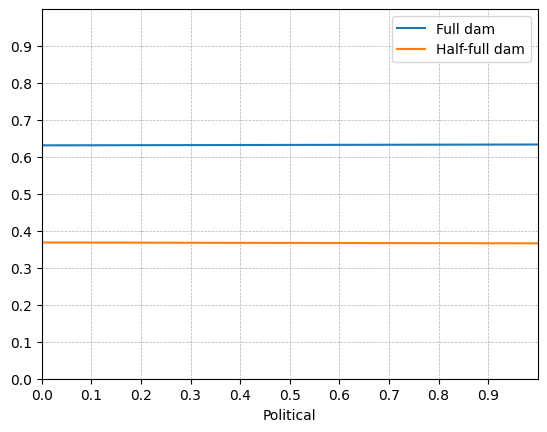

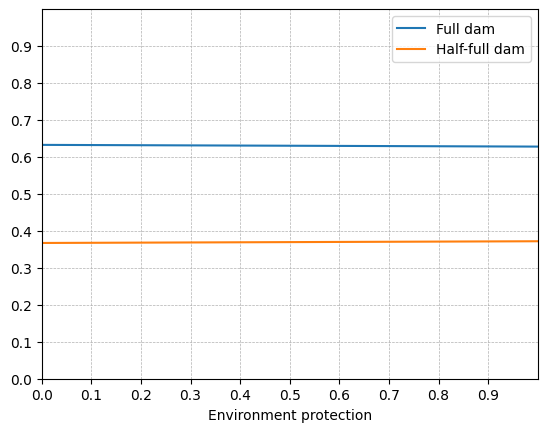

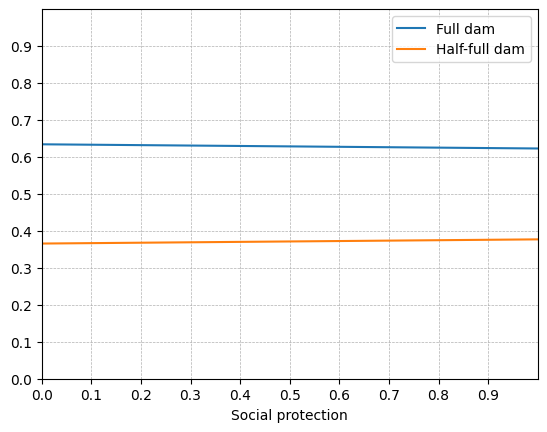

In [8]:
# we can export the sensitivity results to the same result excel, so we used the same outputFile path
# we are doing sensivity analysis with respect to "Financial","Political","Environment protection","Social protection"
calc.sensitivityCellSupermatrixPlot(damModel,"7Alternatives",outputFilepath,"Financial","Political","Environment protection","Social protection")